**H2O Machine Learning Platform**<br>
* Open source, distribution (multi-core + multi-node)
* Core algorithms written in high performance Java
* APIs available in R, Python, Scala, Web GUI
* Easily deploy models to production as pure Java code
* Works on Hadoop, Spark, AWS, laptop

**H2O Cluster**: a block of memory where all computations are going to happen and all the data lives here<br>
* Multi-node cluster with shared memory model
* All computations in memory
* Each node sees only rows of the data
* No limit on cluster size

**H2O Frame**<br>
* Distributed data frames (collection of vectors)
* Columns are distributed (across nodes) arrays
* Works just like R's data.frame or Python Pandas DataFrame

**H2O AutoML functionalities**<br>
H2O’s AutoML is equipped with the following functionalities:
* Necessary data pre-processing capabilities( as in all H2O algorithms )
    * H2O AutoML takes care of data imputation, one-hot encoding, and standardization as part of data preprocessing
* Trains a Random grid of algorithms like GBMs, DNNs, GLMs, etc. using a carefully chosen hyper-parameter space.
    * H2O AutoML automates the process of training and tuning various families of models using random grid search. Random grid search combined with stacked ensembles is a powerful combination.
* Individual models are tuned using cross-validation.
* Two Stacked Ensembles are trained. One ensemble contains all the models (optimized for model performance), and the other ensemble provides just the best performing model from each algorithm class/family (optimized for production use)
    * Ensembles often out-perform individual models. H2O AutoML trains two ensembles using stacking. Ensembles perform particularly well if the models they are based on:1.are individualy strong, and 2. make uncorrelated errors
    *  Stacking uses a second-level metalearning algorithm to find the optimal combination of base learners.
* Returns a sorted “Leaderboard” of all models.
* All models can be easily exported to production.


The purpose of AutoML is to automate the repetitive tasks like pipeline creation and hyperparameter tuning so that data scientists can spend more of their time on the business problem at hand. AutoML also aims to make the technology available to everybody rather than a select few. AutoML and data scientists can work in conjunction to accelerate the ML process so that the real effectiveness of machine learning can be utilized.

<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

### Importing Packages

In [1]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

###  Loading and Exploring the Data

In [2]:
xls = pd.ExcelFile('bank_term_deposit_marketing_analysis.xlsx')

In [3]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [8]:
client_info = pd.read_excel(xls, 'CLIENT_INFO')
loan_history = pd.read_excel(xls, 'LOAN_HISTORY')
marketing_history = pd.read_excel(xls, 'MARKETING HISTORY')
subscription_history = pd.read_excel(xls, 'SUBSCRIPTION HISTORY')

In [9]:
print(client_info.info())
client_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         45211 non-null  int64 
 1   AGE        45211 non-null  int64 
 2   JOB        45211 non-null  object
 3   MARITAL    45211 non-null  object
 4   EDUCATION  45211 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.7+ MB
None


,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [10]:
print(loan_history.info())
loan_history.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       45211 non-null  int64 
 1   DEFAULT  45211 non-null  object
 2   BALANCE  45211 non-null  int64 
 3   HOUSING  45211 non-null  object
 4   LOAN     45211 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.7+ MB
None


,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [11]:
print(marketing_history.info())
marketing_history.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        45211 non-null  int64 
 1   CONTACT   45211 non-null  object
 2   DAY       45211 non-null  int64 
 3   MONTH     45211 non-null  object
 4   DURATION  45211 non-null  int64 
 5   CAMPAIGN  45211 non-null  int64 
 6   PDAYS     45211 non-null  int64 
 7   PREVIOUS  45211 non-null  int64 
 8   POUTCOME  45211 non-null  object
dtypes: int64(6), object(3)
memory usage: 3.1+ MB
None


,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [12]:
print(subscription_history.info())
subscription_history.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            45211 non-null  int64 
 1   TERM_DEPOSIT  45211 non-null  object
dtypes: int64(1), object(1)
memory usage: 706.5+ KB
None


,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [14]:
df = pd.merge(client_info, loan_history, on = ['ID'])
df = pd.merge(df, marketing_history, on = ['ID'])
df = pd.merge(df, subscription_history, on = ['ID'])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            45211 non-null  int64 
 1   AGE           45211 non-null  int64 
 2   JOB           45211 non-null  object
 3   MARITAL       45211 non-null  object
 4   EDUCATION     45211 non-null  object
 5   DEFAULT       45211 non-null  object
 6   BALANCE       45211 non-null  int64 
 7   HOUSING       45211 non-null  object
 8   LOAN          45211 non-null  object
 9   CONTACT       45211 non-null  object
 10  DAY           45211 non-null  int64 
 11  MONTH         45211 non-null  object
 12  DURATION      45211 non-null  int64 
 13  CAMPAIGN      45211 non-null  int64 
 14  PDAYS         45211 non-null  int64 
 15  PREVIOUS      45211 non-null  int64 
 16  POUTCOME      45211 non-null  object
 17  TERM_DEPOSIT  45211 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.6+ MB


,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
# prevent data leak
df = df.drop(['ID'], axis=1)

###  Data Prep & Start H2O

In [34]:
import h2o
h2o.init(nthreads=-1 # -1: use all available threads
        ) # h2o.init(max_mem_size='8G')

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 hours 38 mins
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_puran_7af78t
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.864 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [22]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [23]:
h2o_df.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [24]:
#df[y] = df[y].asfactor()
train, test = h2o_df.split_frame(ratios=[.75], seed=1)
x = train.columns
y = 'TERM_DEPOSIT'
x.remove(y)

### Run H2O AutoML

In [25]:
from h2o.automl import H2OAutoML

In [26]:
aml = H2OAutoML(max_runtime_secs=600,
               balance_classes=True,
                stopping_metric='logloss',
                project_name='Final',
                seed=1
               )
%time aml.train(x=x, y=y, training_frame=train)
# default time for any training process with a show autoML is 3600 seconds,
# corresbonding for a max runtime of one hour
#seed=1# set max runtime, the train running is not reproducible, as system resource is a particular run differ from time to time 
# max_models=20#
#exclude_algos=['DeepLearning']# ecluding certain algo from automobile process

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 2min 40s, sys: 2.94 s, total: 2min 43s
Wall time: 10min 8s


###  AutoML Leaderboard and Ensemble Exploration
Next, we will view the AutoML Leaderboard. Since we did not specify a leaderboard_frame in the H2OAutoML.train() method for scoring and ranking the models, the AutoML leaderboard uses cross-validation metrics to rank the models.

A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric. In the case of binary classification, the default ranking metric is Area Under the ROC Curve (AUC). In the future, the user will be able to specify any of the H2O metrics so that different metrics can be used to generate rankings on the leaderboard.

The leader model is stored at aml.leader and the leaderboard is stored at aml.leaderboard.

To view the entire leaderboard, specify the rows argument of the head() method as the total number of rows:

In [27]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_grid__1_AutoML_20201029_015502_model_2,0.934935,0.198027,0.633476,0.179047,0.249376,0.0621883
GBM_grid__1_AutoML_20201029_015502_model_3,0.934444,0.20063,0.621394,0.174954,0.251574,0.0632894
StackedEnsemble_BestOfFamily_AutoML_20201029_015502,0.933926,0.215386,0.627978,0.172678,0.253986,0.0645089
XGBoost_grid__1_AutoML_20201029_015502_model_5,0.933579,0.199231,0.625019,0.167322,0.249743,0.0623717
XGBoost_grid__1_AutoML_20201029_015502_model_8,0.93309,0.200817,0.618922,0.170853,0.25128,0.0631415
GBM_5_AutoML_20201029_015502,0.933046,0.206957,0.621918,0.163862,0.255904,0.065487
StackedEnsemble_AllModels_AutoML_20201029_015502,0.933038,0.21153,0.628498,0.177044,0.253109,0.064064
XGBoost_3_AutoML_20201029_015502,0.93173,0.202798,0.617305,0.163779,0.252337,0.0636738
XGBoost_grid__1_AutoML_20201029_015502_model_1,0.931499,0.203134,0.616483,0.181648,0.252127,0.0635678
GBM_2_AutoML_20201029_015502,0.931341,0.211199,0.622808,0.16888,0.258062,0.0665962


```Python
se = aml.leader #best model
metalearner = h2o.get_model(se.metalearner()['name']) # bug
```

**Ensemble Exploration**<br>
To understand how the ensemble works, let’s take a peek inside the Stacked Ensemble “All Models” model. The “All Models” ensemble is an ensemble of all of the individual models in the AutoML run. This is often the top-performing model on the leaderboard.

In [39]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

In [40]:
metalearner.varimp()
# how important each of there baseleaner to the ensemble

[('XGBoost_grid__1_AutoML_20201029_015502_model_2',
  0.30670970888905713,
  1.0,
  0.18337601045054672),
 ('DeepLearning_grid__1_AutoML_20201029_015502_model_3',
  0.21395095849410445,
  0.6975682617582043,
  0.1279172848581422),
 ('DeepLearning_1_AutoML_20201029_015502',
  0.19509931288237234,
  0.6361041311311849,
  0.1166462377979481),
 ('GBM_1_AutoML_20201029_015502',
  0.18615829134278314,
  0.6069527176595515,
  0.11130056789652565),
 ('GBM_2_AutoML_20201029_015502',
  0.14139917548022518,
  0.461019561436094,
  0.08453992791581164),
 ('GBM_grid__1_AutoML_20201029_015502_model_8',
  0.14099994997038778,
  0.45971792181313115,
  0.08430123843470835),
 ('XGBoost_grid__1_AutoML_20201029_015502_model_1',
  0.1335070022545085,
  0.4352878255406013,
  0.07982134484532906),
 ('XGBoost_grid__1_AutoML_20201029_015502_model_8',
  0.09573396639914006,
  0.3121321680552633,
  0.05723755171125376),
 ('XGBoost_grid__1_AutoML_20201029_015502_model_4',
  0.06949157791318109,
  0.226571171042771

Examine the variable importance of the metalearner (combiner) algorithm in the ensemble. This shows us how much each base learner is contributing to the ensemble. The AutoML Stacked Ensembles use the default metalearner algorithm (GLM with non-negative weights), so the variable importance of the metalearner is actually the standardized coefficient magnitudes of the GLM.

In [46]:
metalearner.coef_norm()

{'Intercept': -2.917128168800494,
 'XGBoost_grid__1_AutoML_20201029_015502_model_2': 0.30670970888905713,
 'GBM_grid__1_AutoML_20201029_015502_model_3': 0.022617220818503803,
 'XGBoost_grid__1_AutoML_20201029_015502_model_5': 0.0,
 'XGBoost_grid__1_AutoML_20201029_015502_model_8': 0.09573396639914006,
 'GBM_5_AutoML_20201029_015502': 0.04506451557700821,
 'XGBoost_3_AutoML_20201029_015502': 0.0,
 'XGBoost_grid__1_AutoML_20201029_015502_model_1': 0.1335070022545085,
 'GBM_2_AutoML_20201029_015502': 0.14139917548022518,
 'GBM_grid__1_AutoML_20201029_015502_model_4': 0.0,
 'GBM_grid__1_AutoML_20201029_015502_model_5': 0.0,
 'XGBoost_grid__1_AutoML_20201029_015502_model_7': 0.060738917571485716,
 'GBM_grid__1_AutoML_20201029_015502_model_2': 0.0,
 'GBM_grid__1_AutoML_20201029_015502_model_1': 0.0,
 'XGBoost_grid__1_AutoML_20201029_015502_model_6': 0.0,
 'GBM_3_AutoML_20201029_015502': 0.0,
 'GBM_grid__1_AutoML_20201029_015502_model_6': 0.0,
 'XGBoost_1_AutoML_20201029_015502': 0.0002518463

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


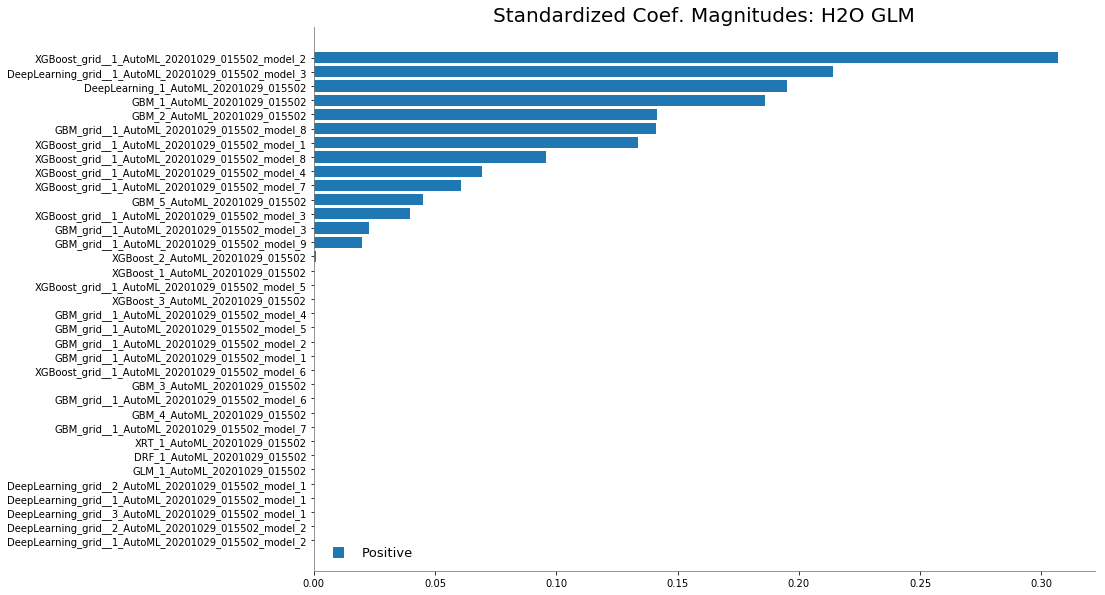

In [42]:
%matplotlib inline
metalearner.std_coef_plot()

**Predicting Using Leader Model**

In [43]:
pred = aml.predict(test)
pred.head()

xgboost prediction progress: |████████████████████████████████████████████| 100%


predict,no,yes
no,0.999521,0.000478711
no,0.999898,0.000101744
no,0.999638,0.000362266
no,0.999812,0.000187925
no,0.999132,0.000867828
no,0.999463,0.000537311
no,0.999286,0.000713879
no,0.997554,0.00244601
no,0.995225,0.00477523
no,0.999408,0.000591912


**Saving the Leader Model**<br>
You can also save and download your model and use it for deploying it to production. There are two ways to save the leader model -- binary format and MOJO format. If you're taking your leader model to production, then we'd suggest the MOJO format since it's optimized for production use.

In [44]:
h2o.save_model(aml.leader, path="./product_backorders_model_bin")

'/Users/puran/Downloads/Project/Automatic Machine Learning with H2O AutoML and Python/product_backorders_model_bin/XGBoost_grid__1_AutoML_20201029_015502_model_2'

In [45]:
aml.leader.download_mojo(path = "./")

'/Users/puran/Downloads/Project/Automatic Machine Learning with H2O AutoML and Python/XGBoost_grid__1_AutoML_20201029_015502_model_2.zip'

###  Base Learner XGBoost Model Exploration

In [47]:
model = h2o.get_model('XGBoost_grid__1_AutoML_20201029_015502_model_2')

In [49]:
model.model_performance(test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.06264557267027894
RMSE: 0.2502909760064852
LogLoss: 0.1975059677251249
Mean Per-Class Error: 0.12540146195464486
AUC: 0.9355520364384183
AUCPR: 0.6081449849037012
Gini: 0.8711040728768367

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2775917537510395: 


,,no,yes,Error,Rate
0,no,9155.0,773.0,0.0779,(773.0/9928.0)
1,yes,345.0,950.0,0.2664,(345.0/1295.0)
2,Total,9500.0,1723.0,0.0996,(1118.0/11223.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.277592,0.629556,218.0
1,max f2,0.117047,0.741915,292.0
2,max f0point5,0.400512,0.600905,174.0
3,max accuracy,0.510199,0.908670,136.0
4,max precision,0.982878,1.000000,0.0
5,max recall,0.003995,1.000000,390.0
6,max specificity,0.982878,1.000000,0.0
7,max absolute_mcc,0.214336,0.583931,246.0
8,max min_per_class_accuracy,0.147484,0.867244,276.0
9,max mean_per_class_accuracy,0.106327,0.874599,299.0



Gains/Lift Table: Avg response rate: 11.54 %, avg score: 11.60 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010069,0.887414,6.825756,6.825756,0.787611,0.922663,0.787611,0.922663,0.068726,0.068726,582.575597,582.575597,0.066308
1,2,0.020048,0.810789,6.112914,6.470919,0.705357,0.848946,0.746667,0.885968,0.061004,0.129730,511.291368,547.091892,0.123988
2,3,0.030028,0.742077,5.571263,6.171924,0.642857,0.773612,0.712166,0.848627,0.055598,0.185328,457.126310,517.192351,0.175558
3,4,0.040007,0.690057,5.648642,6.041394,0.651786,0.715845,0.697105,0.815506,0.056371,0.241699,464.864175,504.139443,0.228000
4,5,0.050076,0.649667,5.521960,5.936953,0.637168,0.670617,0.685053,0.786373,0.055598,0.297297,452.195989,493.695297,0.279469
5,6,0.100062,0.447021,4.742580,5.340298,0.547237,0.545913,0.616207,0.666250,0.237066,0.534363,374.258047,434.029850,0.490950
6,7,0.150049,0.286803,3.738451,4.806666,0.431373,0.363705,0.554632,0.565461,0.186873,0.721236,273.845106,380.666642,0.645692
7,8,0.200036,0.175344,2.301774,4.180722,0.265597,0.227005,0.482405,0.480885,0.115058,0.836293,130.177358,318.072215,0.719251
8,9,0.300009,0.066122,1.143163,3.168503,0.131907,0.111342,0.365607,0.357741,0.114286,0.950579,14.316272,216.850306,0.735430
9,10,0.399982,0.029676,0.332135,2.459569,0.038324,0.044415,0.283805,0.279427,0.033205,0.983784,-66.786489,145.956904,0.659952


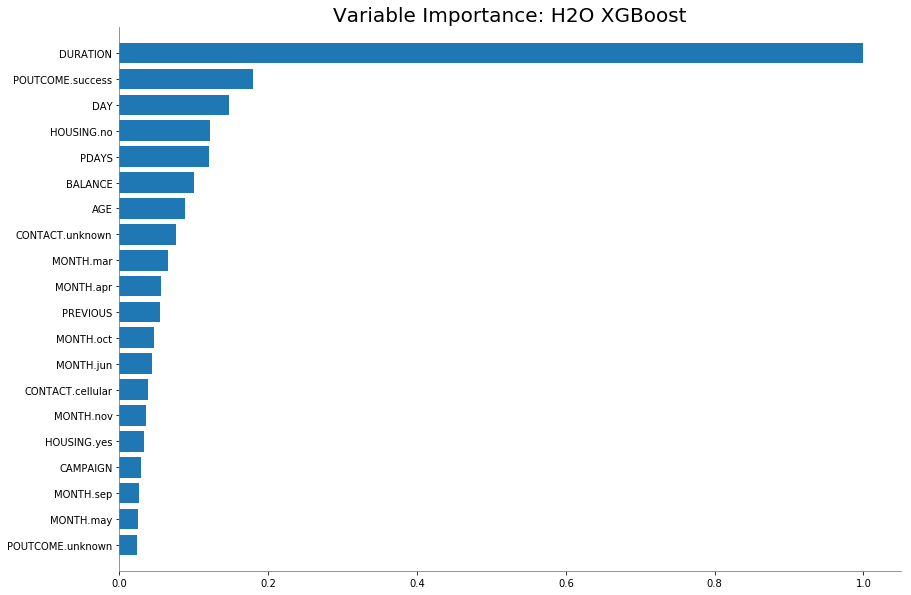

In [50]:
model.varimp_plot(num_of_features=20)
# model.varimp_plot?